In [45]:
from sympy import *
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy.matrices import *
init_printing()
%matplotlib inline

# Problem 1 #

We have the following system

\begin{align}
    q_D &= b_D - 2p + r \\
    q_S &= b_S + 2p - r \\
    r &= 2b_r + 4p - 2q
\end{align}
Convert the system of equations into a linear function of the form $A\mathbf{x} = \mathbf{b}$

\begin{align}
    q + 2p - r &= b_D \\
    1q - 2p + r &= b_S \\
    1q - 2p + \frac{1}{2}r &= b_r
\end{align}

and in matrix terms we have

\begin{align}
    \begin{bmatrix}
        1 & 2 & -1 \\
        1 & -2 & 1 \\
        1 & -2 & \frac{1}{2}
    \end{bmatrix}
    \begin{bmatrix}
        q \\
        p \\
        r
    \end{bmatrix} &= 
    \begin{bmatrix}
        b_D \\
        b_S \\
        b_r
    \end{bmatrix}
\end{align}

### Test Solution Existence and Uniqueness with Determinant
We want to test the determinant $\det A = 0$.  If it is, then we may either have no solution to the system, or an infinite number of solutions.  If $\det A \neq 0$ then we know for every vector $\mathbf{b}$ there is a unique solution to the system.

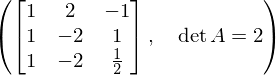

In [46]:
A = Matrix([
        [1, 2, -1],
        [1, -2, 1],
        [1, -2, Rational(1,2)]
    ])

# We calculate the determinant using A.det() function
detA = A.det()
A, Eq(Symbol('\det A'),detA)

### Find A^{-1} and Solve the System

If $A$ is invertible then $\mathbf{x} = A^{-1}\mathbf{b}$.  So calculate the inverse and post multiply $\mathbf{b}$ to find the solution.  Assume that $\mathbf{b} = [10,5,1]$.

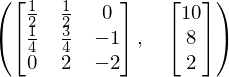

In [47]:
#Instantiate b vector
b = Matrix([
        [10],
        [8],
        [2]
    ])

#Calculate the inverse of the A matrix.
Ainv = A.inv()
Ainv, b

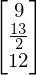

In [48]:
#Use the inverse of A to find the solution x
x = Ainv*b
x

# Problem 2

Consider the system:

\begin{align}
    q_D &= \frac{b_D}{p^2} \\
    q_S &= A_S + \frac{1}{b_S}p^2
\end{align}

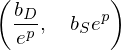

In [49]:
bD = Symbol('b_D', real=True, positive=True)
bS = Symbol('b_S', real=True, positive=True)
AS = Symbol('A_S', real=True, positive=True)
AD = Symbol('A_D', real=True, positive=True)
p = Symbol('p', real=True, positive=True)

demand = bD*exp(-p)
supply = bS*exp(p) 

demand, supply

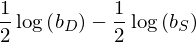

In [50]:
#Find the equilibrium price
p_eq = solve(demand-supply,p)[0]
p_eq

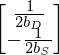

In [51]:
grad = Matrix([p_eq.diff(bD), p_eq.diff(bS)])
grad

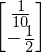

In [52]:
sl = [(bD,5),(bS,1)]
gradval = grad.subs(sl)
gradval

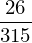

In [53]:
dx = Matrix([Rational(1,9), -Rational(1,7)])
dp = gradval.dot(dx)
dp

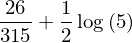

In [54]:
p_eq.subs(sl) + dp

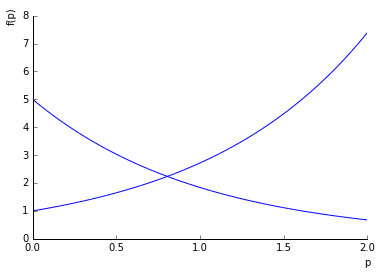

In [55]:
plot(5*exp(-p),1*exp(p),(p,0,2))